In [ ]:
""" Lab: Model Evaluation and Refinement - Used Cars Pricing """
""" Define all imports """
import requests
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings('ignore')

In [ ]:
""" Define all CONSTANTS """

HEADERS = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors",
           "body-style","drive-wheels","engine-location","wheel-base","length","width",
           "height","curb-weight","engine-type","num-of-cylinders","engine-size",
           "fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm",
           "city-mpg","highway-mpg","price"]

FILE_PATH = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
             + 'IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')

In [ ]:
""" Define all functions """
def download(url, filename):
    resp = requests.get(url)
    if resp.status_code == 200:
        with open(filename, 'w') as f:
            f.write(resp.text)

def distributionplot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sbn.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sbn.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()


def pollyplot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()


def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    pollyplot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [ ]:
file_name = ''
if not os.path.isfile('module_5_auto.csv'):
    download(FILE_PATH, 'module_5_auto.csv')
    file_name = 'module_5_auto.csv'

df = pd.read_csv(file_name, header=0)
df = df._get_numeric_data()
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
y_data = df['price']
x_data = df.drop('price', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("test samples: ", x_test.shape[0])
print("train samples: ", x_train.shape[0])

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train[['horsepower']], y_train)
print(lr.score(x_test[['horsepower']], y_test))
print(lr.score(x_train[['horsepower']], y_train))

from sklearn.model_selection import cross_val_score
rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)
print(rcross)

print("The mean of the folds is:", rcross.mean(), "and the standard deviation is:", rcross.std())

rscore = cross_val_score(lr, x_data[['horsepower']], y_data, cv=2)
print(rscore)

In [ ]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4)

In [ ]:
len(yhat)

In [ ]:
df.iloc[0]

In [ ]:
yhat[0]

In [ ]:
y_data[0]

In [ ]:
x_data.iloc[0]['horsepower']

In [ ]:
x_data.iloc[0]

In [ ]:
# total number of predictions
print(len(yhat))
# print the entire first entry of the original dataset
print(df.iloc[0])
# print the horsepower value used in the prediction
print(x_data.iloc[0]['horsepower'])
# print the first predicted value
print(yhat[0])
# print the actual target from original dataset
print(y_data[0])

In [ ]:
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

In [ ]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [ ]:
yhat_train[0]

In [ ]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [ ]:
yhat_test[0]

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distributionplot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
distributionplot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

In [ ]:
pollyplot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [ ]:
poly.score(x_train_pr, y_train)

In [ ]:
poly.score(x_test_pr, y_test)

In [ ]:
rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

(110, 15)


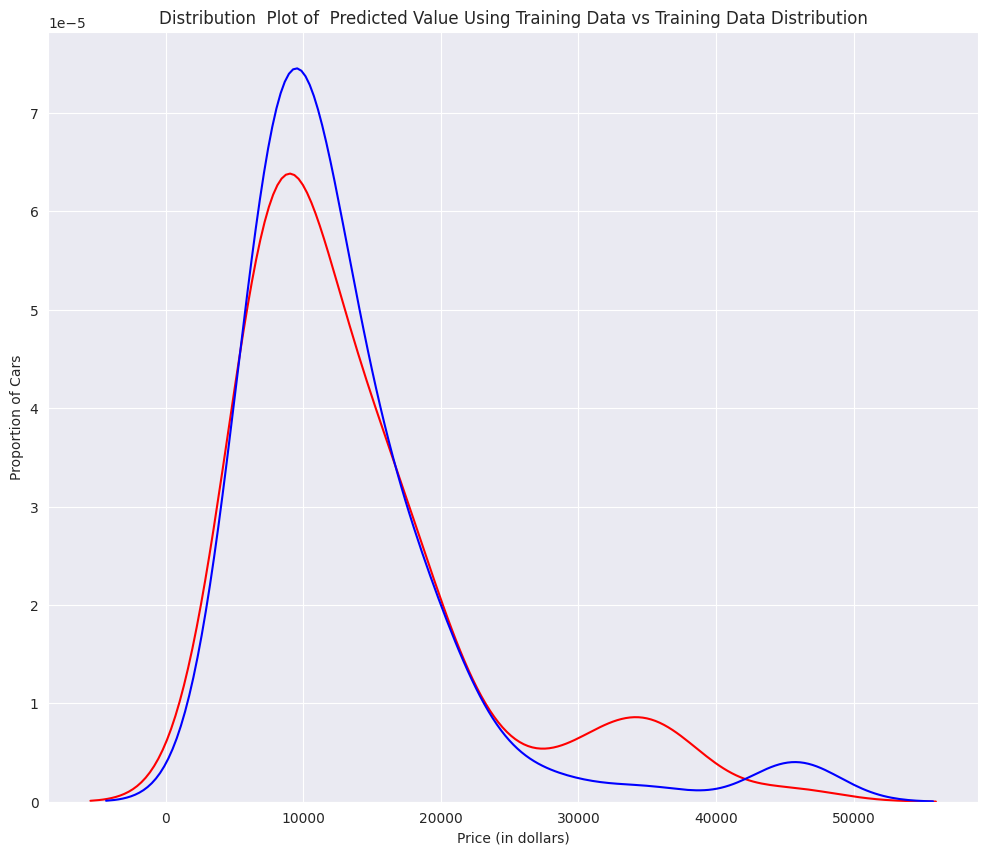

In [101]:
# question 4a) We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1 = PolynomialFeatures(degree=2)

# question 4b) Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform"
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# question 4c) How many dimensions does the new feature have? Hint: use the attribute "shape".
print(x_train_pr1.shape)

# question 4d) Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

# question 4e) Use the method "predict" to predict an output on the polynomial features, then use the function "distributionplot" to display the distribution of the predicted test output vs. the actual test data.
yhat_test = poly1.predict(x_test_pr1)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distributionplot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

# question 4f) Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.
# Around the 5-15000 dollar range the prediction is less accurate because there are quite a bit more cars predicted than actual and
# around the 30-40000 dollar range the prediction is less inaccurate because there are quite a few less cars predicted than actual

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])